In [95]:
from IPython.core.display import HTML
HTML("""
<style>
.consignes{
  font-weight: bold;
  color: #3256a8;
  background-color: #edebdf
}
</style>
""")



# <div class=consignes>Deep Learning et traitement du signal TP 1 </div>
<div class=consignes> L'objectif de ce TP est de prendre en main les outils de modélisation et d'analyse du signal présentés dans le premier cours et d'introduire la problématique de <it>détection</it> dont on parlera dans le cours numéro 3 </div>
<div class=consignes>Deadline : 16 octobre 2024, 13h59, par mail à deepetsignal.mva@gmail.com <br> Effort estimé : 2 à 3 heures maximum</div>
<div class=consignes>Le rendu de ce TP n'est pas obligatoire. Il permet d'obtenir un bonus de 1 (minimum syndical) à 3 (votre notebook servira de correction l'an prochain) points sur la moyenne des TP </div>

<div class=consignes> Listez les noms des étudiants (2 au maximum) ayant participé à ce notebook dans la cellule suivante (prénom, nom).<br/>
Au moment du rendu, le notebook doit être nommé nom1_nom2_dlts_tp1.ipynb </div>

(François, Saulnier)

<div class=consignes>Si vous installez des paquets supplémentaires, merci de les lister dans la cellule suivante avec la syntaxe
    
```
!pip install \< nom_du_paquet \>
```
    
</div>

In [1]:
import numpy as np 
import matplotlib.pylab as plt 
import scipy
import IPython.display as ipd

## <div class=consignes>Partie 1: Audio </div>

### <div class=consignes>Visualisation</div>

 <div class=consignes>Enregistrez un fichier wav de quelques secondes de votre voix. 
  <br>
 Importez le avec scipy.io.wavfile.read et écoutez le dans le notebook avec IPython.display.Audio
</div>

In [2]:
sampling_rate, audio_data = scipy.io.wavfile.read('MaisonCitrouille.wav')
ipd.Audio('MaisonCitrouille.wav')

<div class=consignes>Visualisez la forme d'onde temporelle de ce signal audio. <br>
Estimez et affichez sa Densité Spectrale de Puissance. <br>
Donnez une interprétation de ce que vous observez. 
    </div>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


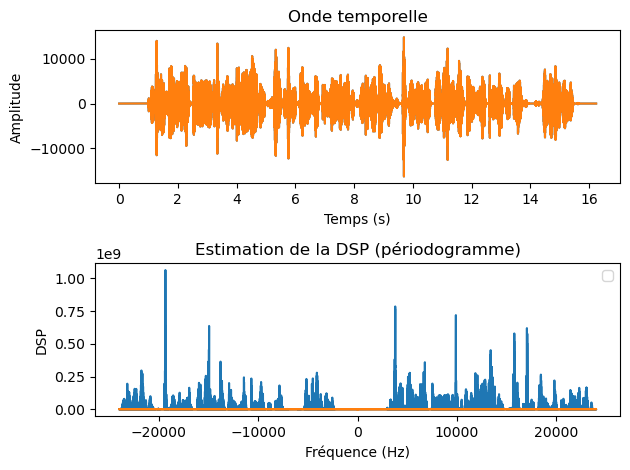

In [ ]:
T = np.linspace(0, len(audio_data) / sampling_rate, len(audio_data))
plt.subplot(2, 1, 1)
plt.plot(T, audio_data)
plt.title('Onde temporelle')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')

audio_fft = np.fft.fft(audio_data)
F = np.fft.fftfreq(len(audio_data), 1 / sampling_rate)
estim_DSP = np.abs(audio_fft) ** 2
plt.subplot(2, 1, 2)
plt.plot(F, estim_DSP)
plt.title("Estimation de la DSP (périodogramme)")
plt.xlabel("Fréquence (Hz)")
plt.ylabel("DSP")

plt.tight_layout()
plt.show()

Sur le spectre temporel on observe des pics d'intensité ainsi que des noeuds. Pourtant il y a une instrumentale derrière la voix, il ne devrait pas y avoir de noeuds. Cela correspond aux seuils de captation du micro (Saturation et trop faible intensité sonore).

Sur le périodogramme on observe des pics d'intensité pour certaines fréquences, ceux-ci semblent correspondre à des harmoniques (faibles et fortes) puisqu'ils se répètent à intervalles réguliers: 3.000Hz, 6.000Hz, 10.000Hz, 13.000Hz, 16.000Hz .

<div class=consignes> Calculez et affichez le spectrogramme du signal. <br>
Justifiez du choix des réglages que vous avez faits. <br>
Sélectionnez une portion pertinente du spectrogramme pour estimer visuellement le pitch de votre voix.
    </div>

c:\Users\franc\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7773: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


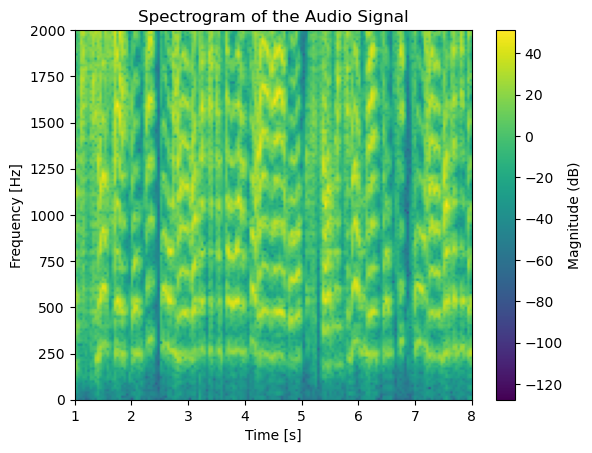

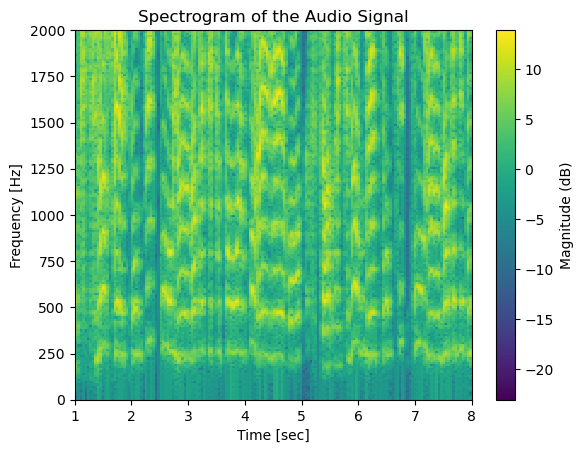

In [99]:
#Le signal MaisonCitroulle est en stereo, on le convertit en mono pour l'analyser
audio_data = audio_data.mean(axis=1)

#On utilise deux méthodes pour afficher le spectrogramme, j'ai trouvé la 1ère sur internet et la 2ème dans le cours. Elles donnent des résultats similaires.

plt.specgram(audio_data, Fs=sampling_rate, NFFT=4096, noverlap=2048, cmap='viridis')           
#On veut une bonne résolution donc on augmente le nombre de FFT (4096 déterminé empiriquement). noverlap est toujours choisi tel que noverlap = NFFT/2
 
plt.ylim(0, 2000)           
plt.xlim(1, 8)
#On réduit les plages fréquentielles et temporelles pour mieux voir les détails

plt.title('Spectrogram of the Audio Signal')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.colorbar(label='Magnitude (dB)')
plt.show()

f, t, tfct = scipy.signal.stft(audio_data, fs=sampling_rate, nperseg=4096, window='hamming')
plt.pcolormesh(t, f, np.log(np.abs(tfct)**2 + 1e-10), shading='auto')
plt.ylim(0, 2000)
plt.xlim(1, 8)
plt.title('Spectrogram of the Audio Signal')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label='Magnitude (dB)')
plt.show()

### <div class=consignes>Calcul du Pitch</div>

<div class=consignes>Proposez une méthode simple pour estimer automatiquement le Pitch de votre voix (cette méthode ne doit pas faire intervenir d'implémentations externes).

Utilisez cette méthode pour estimer les variations du Pitch le long du signal, estimez le pitch toutes les 20 ms et présentez vos résultats sous forme visuelle. 

Ne pas utiliser de méthode "toute faite" que vous pourriez par exemple trouver dans la bibliothèque librosa.

Commentez vos résultats.
    </div>

La fréquence d'échantillonage ne permet pas d'estimer aussi finement le pitch, mais on peut l'estimer pour toutes les valeurs de temps dont on dispose. Pour cela on va calculer l'énergie de la TFCT et identifier les fréquences auxquelles des pics d'énergie sont atteints.

(Malheureusement on n'obtient pas de résultats exploitables pour la MaisonCitrouille... On utilise donc votre enregistrement de la colonie de fourmies)

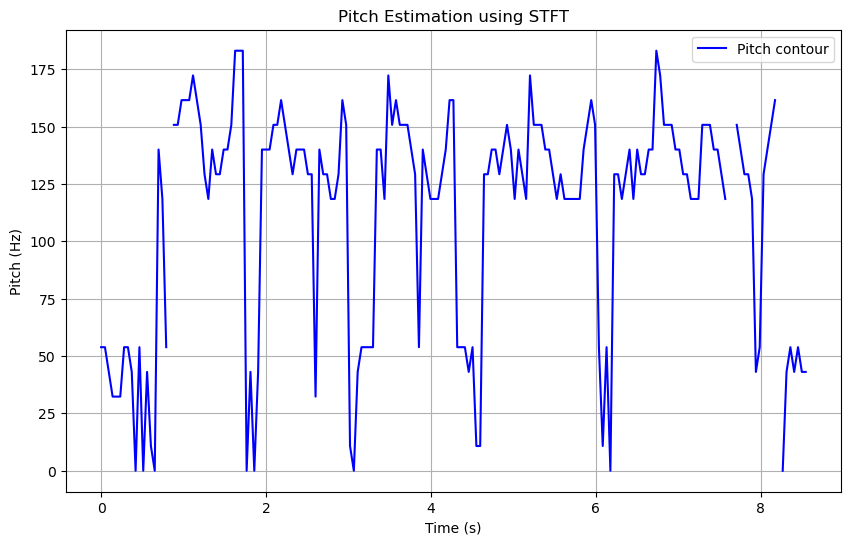

In [100]:
sampling_rate, audio_data = scipy.io.wavfile.read('coloniedefourmies.wav')
ipd.Audio('coloniedefourmies.wav')

f, t, tfct = scipy.signal.stft(audio_data, fs=sampling_rate, nperseg=4096, window='hamming')

spec = np.abs(tfct)**2

# Trouver les indices des fréquences dominantes
dominant_freq_indices = np.argmax(spec, axis=0)

# Convertir les indices en fréquences réelles
dominant_frequencies = f[dominant_freq_indices]        

# Filtrer les fréquences absurdes (>500 Hz)
dominant_frequencies_filtered = np.where(dominant_frequencies > 500, np.nan, dominant_frequencies)
    
# Affichage du contour de pitch
plt.figure(figsize=(10, 6))
plt.plot(t, dominant_frequencies_filtered, label='Pitch contour', color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Pitch (Hz)')
plt.title('Pitch Estimation using STFT')
plt.legend()
plt.grid()
plt.show()    

Le graphe n'est pas continu car on a éliminé les fréquences "absurdes", mais l'allure est assez claire. Dans l'enregistrement on identifie des périodes de parole et des périodes de silence. Cela explique les valeurs < 50Hz. On détermine cependant une moyenne du pitch autour de 150Hz ce qui est cohérent.

## <div class=consignes>Partie 2: Détection d'impulsion </div>

<div class=consignes> Un signal de durée 1 seconde et échantillonné à 1000 Hz est composé d'un bruit blanc gaussien de puissance inconnue et éventuellement d'une impulsion à une fréquence f0 comprise entre 100 et 200 Hz. 
<br><br>
Une série de 1000 signaux est enregistrée dans le fichier signaux_impulsions.npz. 
Ouvez ce fichier avec numpy (cf code plus bas). Le fichier contient une tableau signaux 10000 x 1000 dont chaque ligne contient un signal de durée 1000. Le fichiez contient aussi un tableau labels de taille 10000 dont la ligne i est à TRUE si le signal i contient une impulsion et à 0 sinon. 

</div>

In [101]:
donnees = np.load('signaux_impulsions.npz')
signaux = donnees['data']
labels = donnees['labels']

fe = 1000

## <div class=consignes> Première méthode </div>

<div class=consignes> Proposez une méthode simple  pour décider si un signal contient une impulsion ou non à partir du calcul de l'énergie du signal. Cette méthode fera intervenir un seuil: 
</div>

```python
def contient_impulsion_energie(signal: np.ndarray, seuil: float) -> bool:
```

In [102]:
def contient_impulsion_energie(signal, seuil):
    return np.any(np.abs(signal)**2 > seuil)

<div class=consignes>
Utilisez votre méthode avec un seuil fixé sur tous les signaux pour prédire s'ils contiennent une impulsion ou non. 
</div>

In [103]:
for signal in signaux:
    if contient_impulsion_energie(signal, 1):
        print("Le signal contient une impulsion")
    else:
        print("Le signal ne contient pas d'impulsion")

Le signal contient une impulsion
Le signal contient une impulsion
Le signal contient une impulsion
Le signal ne contient pas d'impulsion
Le signal contient une impulsion
Le signal contient une impulsion
Le signal contient une impulsion
Le signal contient une impulsion
Le signal contient une impulsion
Le signal ne contient pas d'impulsion
Le signal contient une impulsion
Le signal contient une impulsion
Le signal contient une impulsion
Le signal contient une impulsion
Le signal contient une impulsion
Le signal contient une impulsion
Le signal contient une impulsion
Le signal contient une impulsion
Le signal ne contient pas d'impulsion
Le signal contient une impulsion
Le signal ne contient pas d'impulsion
Le signal contient une impulsion
Le signal contient une impulsion
Le signal ne contient pas d'impulsion
Le signal contient une impulsion
Le signal contient une impulsion
Le signal contient une impulsion
Le signal contient une impulsion
Le signal contient une impulsion
Le signal contient

<div class=consignes>
Calculez: <br>
- VP = le nombre de signaux que vous détectez comme contenant une impulsion qui contiennet effectivement une impulsion <br>
- FP = le nombre de signaux que vous détectez comme contenant une impulsion qui ne contiennet en fait PAS une impulsion <br>
- VN = le nombre de signaux que vous détectez comme ne contenant PAS une impulsion qui ne contiennet effectivement PAS une impulsion<br>
- FN = le nombre de signaux que vous détectez comme ne contenant PAS une impulsion mais qui  contiennet en fait une impulsion
</div>

In [104]:
def calcul_valeurs_energie(seuil):
    
    VP = 0
    VN = 0
    FP = 0
    FN = 0

    for i in range(len(signaux)):
        if contient_impulsion_energie(signaux[i], seuil):
            if labels[i]:
                VP += 1
            else:
                FP += 1
        else:
            if labels[i]:
                FN += 1
            else:
                VN += 1
                
    return VP, VN, FP, FN

## <div class=consignes>Deuxième méthode </div>

<div class=consignes>Proposez une deuxième méthode faisant par exemple intervenir le spectrogramme du signal. Cette méthode fera encore intervenir un seuil
</div>

```python
def contient_impulsion_spectrogramme(signal: np.ndarray, seuil: float) -> bool:
```


In [105]:
def contient_impulsion_spetrogramme(signal, seuil):
    f, t, tfct = scipy.signal.stft(signal, fs=fe, nperseg=4096, window='hamming')
    spec = np.abs(tfct)**2
    return np.any(spec > seuil)

<div class=consignes> Calculez pour cette nouvelle méthode, pour un certain seuil les valeurs de VP, FP, VN, FN </div>

In [106]:
def calcul_valeurs_spectrogramme(seuil):
    
    VP = 0
    VN = 0
    FP = 0
    FN = 0
    
    for i in range(len(signaux)):
        if contient_impulsion_spetrogramme(signaux[i], seuil):
            if labels[i]:
                VP += 1
            else:
                FP += 1
        else:
            if labels[i]:
                FN += 1
            else:
                VN += 1
                
    return VP, VN, FP, FN

## <div class=consignes> Comparaison des méthodes </sdivs>

<div class=consignes>Pour une méthode de détection et un seuil donné, la précision est définie comme: 

$$ \frac{\sharp\text{Signaux détectés comme contenant une impulsion qui en contiennent effectivement une}}{\sharp\text{Signaux détectés comme positifs }}$$
et le rappel comme:
$$ \frac{\sharp\text{Signaux détectés comme contenant une impulsion qui en contiennent effectivement une}}{\sharp \text{Signaux contenant une impulsions}} $$
    
</div>

<div class=consignes> Donnez une interprétation de ces deux métriques </div>

La première métrique permet de se rendre compte si le seuil est sous-évalué puisque le dénominateur compte le nombre de signaux qui dépassent le seuil.
A l'inverse la seconde permet de se rendre compte si le seuil est sur-évalué puisque le dénominateur compte le nombre de signaux positifs au total (ceux qui sont au-dessus et en-dessous du seuil).

<div class=consignes>
    Pour chacune des deux méthodes proposées, faites varier le seuil sur une dizaine de valeurs et calculez la précision et le rappel pour chacun de ces seuils. 

Affichez dans le plan (précision , rappel) les points de fonctionnement des deux méthodes pour différents seuils. <br>Commentez le résultat. 
    </div>

Résultats méthode énergie avec Seuil = 0.5
VP = 5004 FP = 4144 VN = 852 FN = 0
Precision = 0.5470048097944906
Rappel = 1.0


Résultats méthode énergie avec Seuil = 0.7
VP = 5001 FP = 3837 VN = 1159 FN = 3
Precision = 0.5658520027155465
Rappel = 0.999400479616307


Résultats méthode énergie avec Seuil = 1
VP = 4999 FP = 3423 VN = 1573 FN = 5
Precision = 0.5935644739966753
Rappel = 0.9990007993605116


Résultats méthode énergie avec Seuil = 1.4
VP = 4932 FP = 2984 VN = 2012 FN = 72
Precision = 0.6230419403739262
Rappel = 0.9856115107913669


Résultats méthode énergie avec Seuil = 1.5
VP = 4820 FP = 2861 VN = 2135 FN = 184
Precision = 0.6275224580132795
Rappel = 0.9632294164668266


Résultats méthode énergie avec Seuil = 1.6
VP = 4679 FP = 2760 VN = 2236 FN = 325
Precision = 0.628982390106197
Rappel = 0.9350519584332534


Résultats méthode énergie avec Seuil = 1.7
VP = 4527 FP = 2676 VN = 2320 FN = 477
Precision = 0.6284881299458559
Rappel = 0.9046762589928058


Résultats méthode énergie 

c:\Users\franc\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:2014: UserWarning: nperseg = 4096 is greater than input length  = 1000, using nperseg = 1000
  warnings.warn('nperseg = {0:d} is greater than input length '


Résultats méthode spectrogramme avec Seuil = 0.001
VP = 4960 FP = 3078 VN = 1918 FN = 44
Precision = 0.6170689226175665
Rappel = 0.991207034372502


Résultats méthode spectrogramme avec Seuil = 0.005
VP = 4605 FP = 82 VN = 4914 FN = 399
Precision = 0.9825048005120546
Rappel = 0.920263788968825


Résultats méthode spectrogramme avec Seuil = 0.01
VP = 3811 FP = 0 VN = 4996 FN = 1193
Precision = 1.0
Rappel = 0.7615907274180655


Résultats méthode spectrogramme avec Seuil = 0.03
VP = 1164 FP = 0 VN = 4996 FN = 3840
Precision = 1.0
Rappel = 0.23261390887290168


Résultats méthode spectrogramme avec Seuil = 0.05
VP = 224 FP = 0 VN = 4996 FN = 4780
Precision = 1.0
Rappel = 0.04476418864908074


Résultats méthode spectrogramme avec Seuil = 0.1
VP = 0 FP = 0 VN = 4996 FN = 5004
Precision = 0
Rappel = 0.0




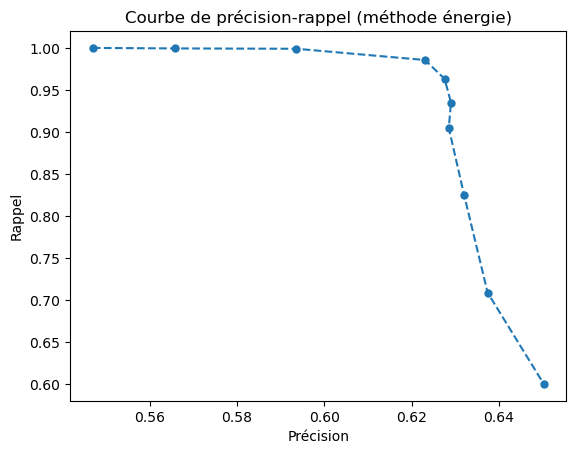

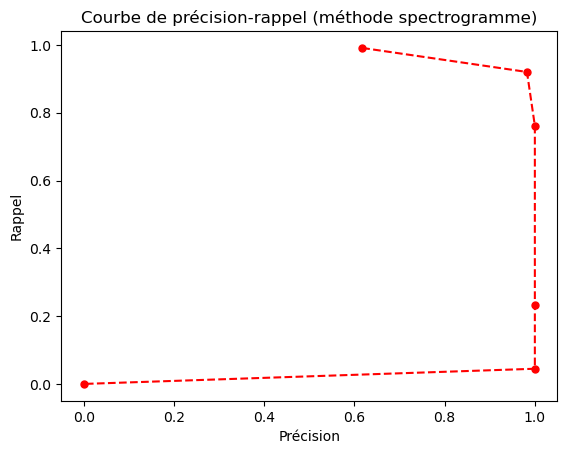

In [107]:
seuil_energie = [0.5, 0.7, 1, 1.4, 1.5, 1.6, 1.7, 2, 2.5, 3] 
seuil_spectrogramme = [1e-3, 5*1e-3, 1e-2, 3*1e-2, 5*1e-2, 0.1]
precision_energie = []
rappel_energie = []
precision_spectrogramme = []
rappel_spectrogramme = []

for seuil in seuil_energie:
    VP, VN, FP, FN = calcul_valeurs_energie(seuil)
    if VP + FP == 0:
        precision = 0
        precision_energie.append(precision)
    else:
        precision = VP / (VP + FP)
        precision_energie.append(precision)
    if VP + FN == 0:
        rappel = 0
        rappel_energie.append(rappel)
    else:
        rappel = VP / (VP + FN)
        rappel_energie.append(rappel)
    print("Résultats méthode énergie avec Seuil =", seuil)
    print("VP =", VP,"FP =", FP,"VN =", VN,"FN =", FN)
    print("Precision =", precision)
    print("Rappel =", rappel)
    print("\n")
    
for seuil in seuil_spectrogramme:
    VP, VN, FP, FN = calcul_valeurs_spectrogramme(seuil)
    if VP + FP == 0:
        precision = 0
        precision_spectrogramme.append(precision)   
    else:
        precision = VP / (VP + FP)
        precision_spectrogramme.append(precision)
    if VP + FN == 0:
        rappel = 0
        rappel_spectrogramme.append(rappel)
    else:
        rappel = VP / (VP + FN)
        rappel_spectrogramme.append(rappel)
    print("Résultats méthode spectrogramme avec Seuil =", seuil)
    print("VP =", VP, "FP =", FP, "VN =", VN, "FN =", FN)
    print("Precision =", precision)
    print("Rappel =", rappel)
    print("\n")
    
plt.plot(precision_energie, rappel_energie, '.', markersize=10, linestyle='--')
plt.title('Courbe de précision-rappel (méthode énergie)')
plt.xlabel('Précision')
plt.ylabel('Rappel')
plt.show()
plt.plot(precision_spectrogramme, rappel_spectrogramme, '.', markersize=10, linestyle='--', color='red')
plt.title('Courbe de précision-rappel (méthode spectrogramme)')
plt.xlabel('Précision')
plt.ylabel('Rappel')
plt.show()


On peut identifier parmi les seuils choisis que pour la méthode énergie, seuil = 1.4 semble le meilleur. Et pour la méthode spectrogramme, seuil = 0.005 est presque optimal. Pour la première méthode, il paraît difficile d'obtenir de bons résultats. On constate également que la seconde méthode semble très sensible aux variations du seuil. La dernière valeur ne permet pas de détecter le moindre signal présentant une impulsion.
La seconde méthode semble donc être la plus efficace pour déterminer des impulsions dans les signaux.